## Lokta Volterra Model
A coupled non linear ODE modelling the asymmetric competitive interaction between two species: a prey that reproduces asexually and a predator that reproduces by eating prey! 
$$
\frac{dx}{dt} = ax - bxy \\
\frac{dy}{dt} = cxy - dy
$$
In the above $a,b,c,d$ are constants. The above equation has a single fixed point, which is a _center_, all trajectories with $x>0,y>0$ form closed orbits. 
The above system has a conserved quantity $V$ can be found by rearranging the above eqn to obtain ${dy}{dx}$ and separating terms:
$$
V = dx - c\ln{x} + by - a\ln{y}
$$

In [456]:
import numpy as np
from scipy.integrate import odeint

def lotka_volterra(pop,t,a,b,c,d):
    return np.array([a*pop[0] - b*pop[0]*pop[1],c*pop[1]*pop[0] - d*pop[1]])


pop0 = np.array([0.5,0.5])
pop0_2 = np.array([5,0.5])
t = np.linspace(0,10,100)
dt = t[1] - t[0]
a=1 # Prey Growth Rate
b=1 # Prey death rate (based off consumption of Prey)
c=1 # Predator growth rate (based off consumption of Prey)
d=1 # Predator death rate
pops = odeint(lotka_volterra,pop0,t,args=(a,b,c,d)) 

In [457]:
pop_samples = np.array([ odeint(lotka_volterra,np.random.uniform(low=0.1,high=5,size=(2,)),t,args=(a,b,c,d))for _ in range(10)])

In [458]:
pop_samples.shape

(10, 100, 2)

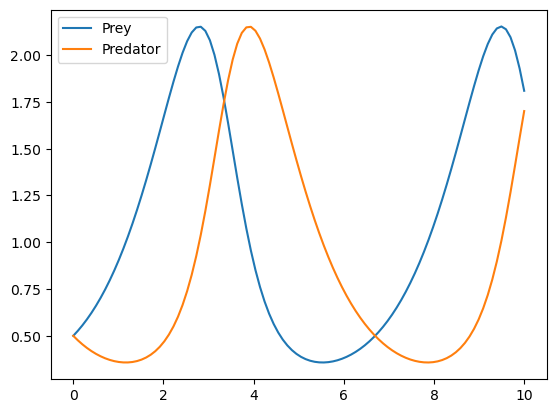

In [459]:
import matplotlib.pyplot as plt
plt.plot(t,pops[:,0],label='Prey')
plt.plot(t,pops[:,1],label='Predator')
plt.legend()


Text(0, 0.5, 'Predator')

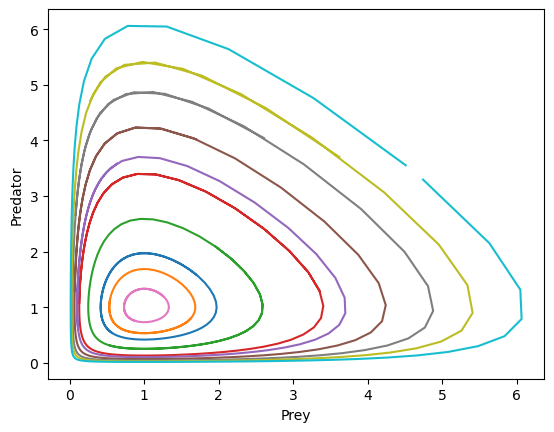

In [460]:
for pop in pop_samples:
    plt.plot(pop[:,0],pop[:,1])
plt.xlabel("Prey")
plt.ylabel("Predator")

In [461]:
preys = np.linspace(0.1,10,100)
predators = np.linspace(0.1,10,100)
PREY,PRED = np.meshgrid(preys,predators)
V = d*PREY - c*np.log(PREY) + b*PRED - a*np.log(PRED)

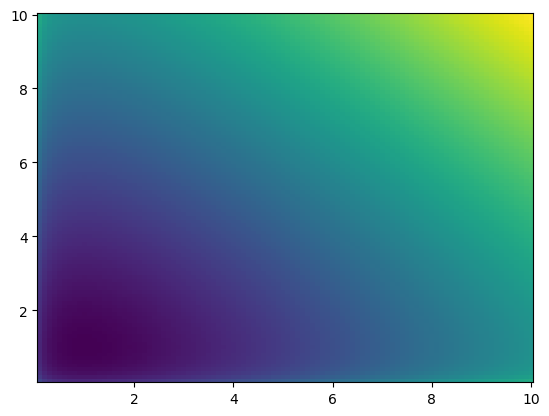

In [462]:
plt.pcolormesh(PREY,PRED,V)

## sparse regression equation discovery

In [463]:
dpreydt = np.gradient(pops[:,0],t)
dpreddt = np.gradient(pops[:,1],t)

In [481]:
ones = np.ones(len(pops)) # 1
prey = pops[:,0] # x
pred = pops[:,1] # y 
preypred = pops[:,0]*pops[:,1] # xy 
prey2= pops[:,0]*pops[:,0]#x^2
pred2= pops[:,1]*pops[:,1] #y^2
predsin = np.sin(pred)
preysin = np.sin(prey)
predcos = np.cos(pred)
preycos = np.cos(prey)
library = np.stack([ones,prey,pred,preypred,prey2,pred2],axis=-1)

In [486]:
vector = np.linalg.lstsq(library,dpreydt,rcond=None)[0]
vector

array([-0.03462723,  1.0446201 ,  0.03851694, -0.98274751, -0.02538398,
       -0.02179879])

In [500]:
from scipy.optimize import minimize
def loss(x):
    return np.sum((np.dot(library,x) - dpreydt)**2)/(2*dpreydt.shape[0]) + 0.05*np.sum(np.abs(x))

minimize(loss,np.ones(library.shape[1]),method='Powell')

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.08441174855849197
       x: [ 6.194e-02  5.947e-01 -1.327e-13 -6.820e-01  5.663e-02
           -7.915e-02]
     nit: 15
   direc: [[-2.839e-01  5.490e-01 ... -2.339e-01  1.846e-01]
           [-1.948e-01  1.429e-01 ... -1.218e-01 -1.167e-01]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 4.685e-02  9.171e-02 ... -4.937e-02  5.428e-02]]
    nfev: 1126